#    * First part : Importing our Data and Analyzing it *

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
df = pd.read_csv(r'C:\Users\wailb\Desktop\IronHack LABS\wine-data-modeling\wine.csv')

df.head()

,wine,vintage,region,varietal,rating,price
0,Rust en Vrede Cabernet Sauvignon,4,South Africa,Cabernet Sauvignon,91,29.99
1,Bonterra Organically Grown Merlot,4,California,Merlot,90,14.99
2,Allegrini Palazzo della Torre,2,Italy,Other Red,90,19.99
3,Marcarini Barolo Brunate,2,Italy,Other Red,94,55.99
4,Chateau Beausejour Duffau,3,France,Other Red,96,97.99


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wine      200 non-null    object 
 1   vintage   200 non-null    int64  
 2   region    200 non-null    object 
 3   varietal  200 non-null    object 
 4   rating    200 non-null    int64  
 5   price     200 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [3]:
df.describe()

,vintage,rating,price
count,200.000000,200.000000,200.000000
mean,3.345000,92.030000,44.621050
std,1.328457,2.374297,46.690988
min,0.000000,88.000000,7.990000
25%,2.000000,90.000000,17.990000
50%,4.000000,91.000000,25.990000
75%,4.000000,93.000000,55.240000
max,6.000000,100.000000,269.000000


___
# * Second Part :  Exploratory Data Analysis (EDA) *

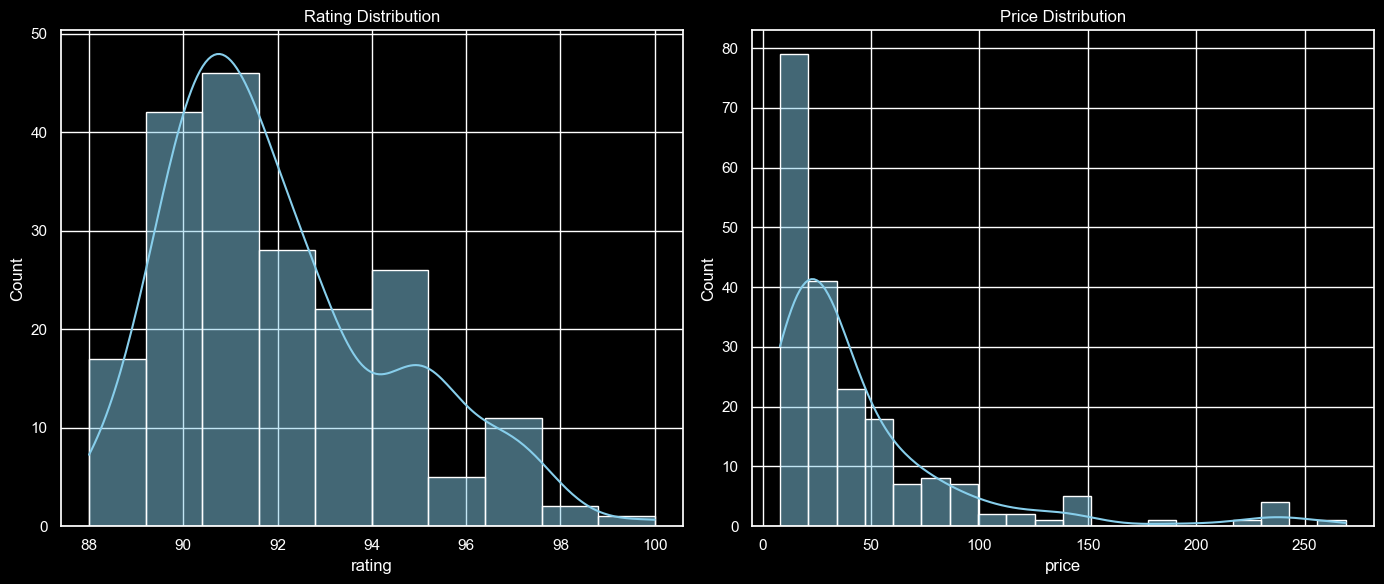

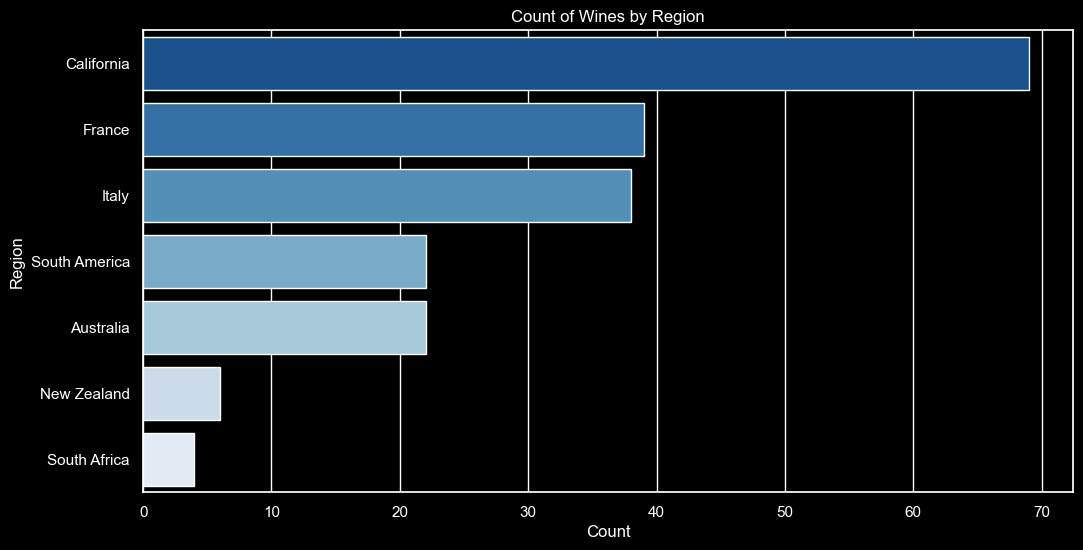

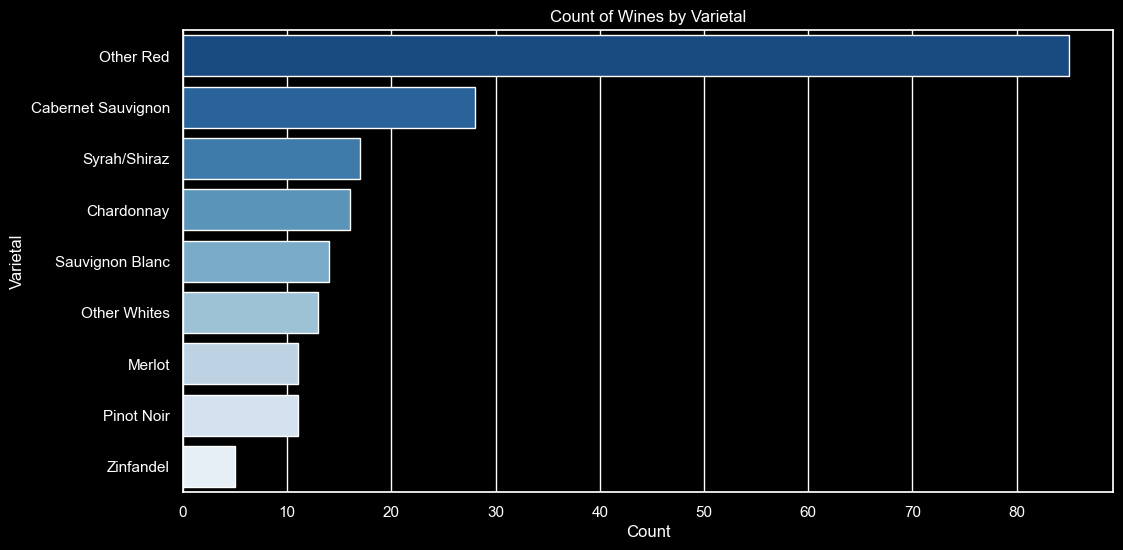

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.style.use("dark_background")

# Plotting distribution of ratings and prices to get a sense of the data spread
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Rating distribution
sns.histplot(df['rating'], bins=10, kde=True, color="skyblue", ax=ax[0])
ax[0].set_title('Rating Distribution')

# Price distribution
sns.histplot(df['price'], bins=20, kde=True, color="skyblue", ax=ax[1])
ax[1].set_title('Price Distribution')

plt.tight_layout()
plt.show()

# Counting by region
plt.figure(figsize=(12, 6))
region_order = df['region'].value_counts().index
sns.countplot(y='region', data=df, order=region_order, palette="Blues_r")
plt.title('Count of Wines by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# Counting by varietal
plt.figure(figsize=(12, 6))
varietal_order = df['varietal'].value_counts().index
sns.countplot(y='varietal', data=df, order=varietal_order, palette="Blues_r")
plt.title('Count of Wines by Varietal')
plt.xlabel('Count')
plt.ylabel('Varietal')
plt.show()

## _Key Insights_:
__Ratings:__
* The wine ratings range from 88 to 100, with a mean rating of 92.
* Distribution shows a normal-like trend, skewed towards higher ratings.

__Prices__:
* Prices vary widely, from 7.99USD to 269USD, with an average price of 44.62USD.
* The price distribution is right-skewed, indicating a concentration of wines in the lower price range with a few high-priced outliers.


__Vintage Issue__:
* The vintage data seems to be incorrectly recorded or represents a coded value rather than the actual year, ranging from 0 to 6.



___
# * Third Part : Data Cleaning *

In [5]:
# Let's start the data cleaning process by performing the checks outlined:

# Checking for duplicate rows
duplicates = df.duplicated().sum()

# Checking for inconsistencies in categorical data
wine_unique = df['wine'].unique()
region_unique = df['region'].unique()
varietal_unique = df['varietal'].unique()

# Outliers examination for 'price' using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Summary of findings
{
    'duplicates': duplicates,
    'unique_wines': len(wine_unique),
    'unique_regions': len(region_unique),
    'unique_varietals': len(varietal_unique),
    'outliers_count': outliers.shape[0],
    'outliers': outliers
}

{'duplicates': 39,
 'unique_wines': 161,
 'unique_regions': 7,
 'unique_varietals': 9,
 'outliers_count': 15,
 'outliers':                                              wine  vintage      region  \
 23                                   Gaja Sperss         2       Italy   
 52                Clarendon Hills Astralis Syrah         0   Australia   
 54                Clarendon Hills Astralis Syrah         0   Australia   
 67                                   Gaja Sperss         2       Italy   
 71                                   Gaja Sperss         2       Italy   
 77                                Chateau Gracia         3      France   
 87                              Chateau Montrose         2      France   
 88                          Chateau Rauzan Segla         2      France   
 92                                   Gaja Sperss         2       Italy   
 105               Clarendon Hills Astralis Syrah         0   Australia   
 126                          Chateau Lynch-Bages    

## _Data Cleaning Insights_:


__Duplicates:__ 39 duplicate rows.

__Unique Values:__
* 161 unique wines.
* 7 unique regions.
* 9 unique varietals.

__Outliers in Price:__
* 15 outliers based on the IQR method.
* Some wines are significantly more expensive, e.g., Gaja Sperss at $239.

In [6]:
# Performing the cleaning actions based on the findings

# Removing duplicate rows
df_cleaned = df.drop_duplicates()

# As the outliers are possibly rare or high-value wines, we will not remove them for now,

# Considering the 'vintage' column issue, we need clarification on what the values represent before proceeding.
# Therefore, we will not alter the 'vintage' column at this point.

# Re-checking the dataset after cleaning
cleaned_info = {
    'initial_count': df.shape[0],
    'cleaned_count': df_cleaned.shape[0],
    'duplicates_removed': df.shape[0] - df_cleaned.shape[0]
}

cleaned_info, df_cleaned.head()

({'initial_count': 200, 'cleaned_count': 161, 'duplicates_removed': 39},
                                  wine  vintage        region  \
 0   Rust en Vrede Cabernet Sauvignon         4  South Africa   
 1  Bonterra Organically Grown Merlot         4    California   
 2      Allegrini Palazzo della Torre         2         Italy   
 3           Marcarini Barolo Brunate         2         Italy   
 4          Chateau Beausejour Duffau         3        France   
 
              varietal  rating  price  
 0  Cabernet Sauvignon      91  29.99  
 1              Merlot      90  14.99  
 2           Other Red      90  19.99  
 3           Other Red      94  55.99  
 4           Other Red      96  97.99  )

# * Understanding the Feature "Vintage" more before moving to ML *

In [7]:
# Grouping by 'vintage' to see if there's any discernible pattern related to 'price' and 'rating'.
vintage_analysis = df_cleaned.groupby('vintage')[['price', 'rating']].agg(['mean', 'median', 'count'])

vintage_analysis

price                   rating             
              mean  median count       mean median count
vintage                                                 
0        78.245000  69.495     4  94.250000   94.5     4
1        48.865000  44.990     8  92.750000   92.5     8
2        63.371379  39.990    29  93.551724   94.0    29
3        50.612973  32.990    37  91.729730   91.0    37
4        29.881091  23.990    55  91.436364   91.0    55
5        21.823333  17.990    24  90.458333   90.0    24
6        12.740000  12.990     4  91.000000   90.0     4

## _Statistical Analysis on 'Vintage' Feature_
The vintage feature has an inverse relationship with both price and rating. As the vintage value increases, both price and rating tend to decrease. Here's a summary by vintage:

* __0:__ High average price (78.24USD), high ratings.

* __1:__ Moderate average price (48.86USD), high ratings.

* __2:__ Variable average price (63.37USD), high ratings.

* __3:__ Lower average price (50.61USD), slightly lower ratings.

* __4:__ Even lower average price (29.88USD), slightly lower ratings.

* __5:__ Low average price (21.82USD), lower ratings.

* __6:__ Lowest average price (12.74USD), lower ratings.



___
#  Machine Learning (ML)
Using _Decision Tree Regressor_, _Random Forest Regressor_ and _K-Neighbors Regressor_

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Preparing the data for modeling
# Features and target
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

# Encoding categorical features and scaling numerical features
numerical_features = ['vintage','rating']
categorical_features = ['wine', 'region', 'varietal']

# Creating transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Column transformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and return model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', model)])
    
    # Training the model pipeline
    model_pipeline.fit(X_train, y_train)
    
    # Predicting
    predictions = model_pipeline.predict(X_test)
    
    # Evaluating
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Initializing models with different parameters
models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5)
}

# Evaluating each model
scores = {name: evaluate_model(model, X_train, X_test, y_train, y_test) for name, model in models.items()}

scores

{'DecisionTreeRegressor': {'MAE': 18.03060606060606,
  'MSE': 1086.290306060606,
  'RMSE': 32.958918460116465,
  'R2': -0.0494894695896424},
 'RandomForestRegressor': {'MAE': 13.786490909090906,
  'MSE': 511.6699936575765,
  'RMSE': 22.620123643728753,
  'R2': 0.5056641238049804},
 'KNeighborsRegressor': {'MAE': 15.340484848484849,
  'MSE': 389.2596928484848,
  'RMSE': 19.729665299960992,
  'R2': 0.6239274655209974}}

### Decision Tree Regressor
* __MAE__: 18.03
* __MSE:__ 1086.29
* __RMSE:__ 32.96
* __R2:__ -0.049

### Random Forest Regressor
* __MAE:__ 13.79
* __MSE:__ 511.67
* __RMSE:__ 22.62
* __R2:__ 0.506

### K-Neighbors Regressor
* __MAE:__ 15.34
* __MSE:__ 389.26
* __RMSE:__ 19.73
* __R2:__ 0.624

## _Key Insights from Model Evaluation:_


* __K-Neighbors Regressor__ performed the best, suggesting that price predictions in this context may work well with non-linear, instance-based learning.

* __Random Forest Regressor__ also showed promising results, outperforming the Decision Tree, likely due to its ensemble approach that reduces overfitting.

* __Decision Tree Regressor__ had the weakest performance, potentially due to overfitting or lack of depth in the tree.
Model-Specific Observations

__R2 Scores:__
The K-Neighbors model explains about 62.4% of the variance in the data, which is decent for such a diverse dataset.


___
# * Enhancing Our Model *
Using Hyperparameter-tuning

In [9]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids
dt_params = {
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_params = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

knn_params = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance']
}

# Models for tuning
models_to_tune = {
    'DecisionTreeRegressor': (DecisionTreeRegressor(random_state=42), dt_params),
    'RandomForestRegressor': (RandomForestRegressor(random_state=42), rf_params),
    'KNeighborsRegressor': (KNeighborsRegressor(), knn_params)
}

# Recording the best parameters and scores
best_params = {}
best_scores = {}

# Perform GridSearchCV for hyperparameter tuning
for name, (model, params) in models_to_tune.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5,
                               scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_params[name] = grid_search.best_params_
    best_scores[name] = -grid_search.best_score_  # Convert back to positive MSE

best_params, best_scores

({'DecisionTreeRegressor': {'model__max_depth': None,
   'model__min_samples_leaf': 4,
   'model__min_samples_split': 2},
  'RandomForestRegressor': {'model__max_depth': None,
   'model__min_samples_leaf': 2,
   'model__min_samples_split': 5,
   'model__n_estimators': 50},
  'KNeighborsRegressor': {'model__n_neighbors': 7,
   'model__weights': 'distance'}},
 {'DecisionTreeRegressor': 872.546783021262,
  'RandomForestRegressor': 714.6208158953757,
  'KNeighborsRegressor': 840.2477589496323})

In [10]:
# Recreate models with the best parameters
dt_best_model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=42)
rf_best_model = RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42)
knn_best_model = KNeighborsRegressor(n_neighbors=7, weights='distance')

# Models dictionary
models_optimized = {
    'DecisionTreeRegressor': dt_best_model,
    'RandomForestRegressor': rf_best_model,
    'KNeighborsRegressor': knn_best_model
}

# Calculating R2 scores for the optimized models
r2_scores_optimized = {}

for name, model in models_optimized.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    r2_scores_optimized[name] = r2_score(y_test, predictions)

r2_scores_optimized


{'DecisionTreeRegressor': 0.3494474841879591,
 'RandomForestRegressor': 0.5679280815299812,
 'KNeighborsRegressor': 0.7519672957862905}

# _Hyperparameter Tuning Results:_

## Best Parameters:
__Decision Tree Regressor__
* Max Depth: None (unlimited)
* Min Samples Leaf: 4
* Min Samples Split: 2

__Random Forest Regressor__
* Max Depth: None (unlimited)
* Min Samples Leaf: 2
* Min Samples Split: 5
* N Estimators: 50

__K-Neighbors Regressor__
* N Neighbors: 7
* Weights: Distance

## Best Scores:
(__MSE__)
* Decision Tree Regressor: 872.55
* Random Forest Regressor: 714.62
* K-Neighbors Regressor: 840.25

(__R2__)
* Decision Tree Regressor: 0.349
* Random Forest Regressor: 0.568
* K-Neighbors Regressor: 0.752

## _Key Insights_:
* __K-Neighbors Regressor__ stands out with the highest R2 score (0.752), indicating it explains approximately 75.2% of the variance in the wine price dataset with the test data. This performance is notably superior, suggesting that the model, with distance weighting and an optimal neighbor count of 7, captures the underlying patterns in the dataset very effectively.

* __Random Forest Regressor__ also shows a strong performance with an R2 score of 0.568, reinforcing its ability to handle complex data while learning.
* __Decision Tree Regressor__ has the lowest R2 score of 0.349, which, while better than a baseline model, indicates there's significant room for improvement. Decision Trees can be sensitive to the specific training set and might overfit or not capture the full complexity of the data without careful tuning and constraints.

## Conclusion

The K-Neighbors Regressor, with the specific tuning of neighbors and weights, proved to be the most effective model for predicting wine prices in this dataset. This insight could guide the selection of models for similar predictive tasks or further exploration into feature engineering and model tuning to improve predictions.

___